## Part 1: Data Cleaning

Data cleaning is an essential stage of any data science/analysis project. It ensures that we're dealing with validated data free from errors, inconsistencies and/or ommissions. Any predictions or insights gained from invalidated data are mot reliable at all. Hence, it is always a great idea to clean data andmake sure it is validated before starting any exploration or making any predictions.

### Importing the data

Upon opening the excel file, we notice that there are 6 tabs of data as described in the email. These are: 'SKU Master', 'Store 312', 'Store 323', 'Store 415', 'Store 521' and 'Store 632'. Let us begin with importing Store_312 as a pandas dataframe.

In [1]:
import pandas as pd

In [2]:
# Use your own paths.
SKU_Master = pd.read_excel("/Users/mac/Desktop/Data Science/Projects/TinyCo Project/TinyCo_Data_RAW.xlsx", sheet_name="SKU Master")
Store_312 = pd.read_excel("/Users/mac/Desktop/Data Science/Projects/TinyCo Project/TinyCo_Data_RAW.xlsx", sheet_name="Store 312")

### View a subset of the data

In [3]:
Store_312.head()

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
0,79444,50012011250,312,2014-08-04,3,29.97
1,79445,50012011250,312,2014-08-05,2,19.98
2,79446,50012011250,312,2014-08-06,5,49.95
3,79447,50012011250,312,2014-08-07,3,29.97
4,79448,50012011250,312,2014-08-08,7,69.93


We will begin with analyzing Store_312 with reference to SKU_Master.

### Exploring and Cleaning the data

#### First Steps

In [4]:
SKU_Master.dtypes

Department      int64
Class           int64
Style           int64
Color           int64
SKU             int64
Cost          float64
Price         float64
Vendor         object
dtype: object

In [5]:
Store_312.dtypes

DB_ID                    int64
SKU                     object
Store                    int64
Date            datetime64[ns]
Unit Sales              object
Dollar Sales           float64
dtype: object

There is something interesting about the Store_312 dtypes. Both 'SKU' and 'Unit Sales' have object/string dtypes. We would normally expect these to be integers.

This kind of data can present us with a few issues:
 - Data that we expect to be integers but is presented in string form can contain typing erros, i.e., foreign characters that might not have the same format as the other values in the feature,
 - String/object data types cannot be plotted quantitatively on a plot.

Let us get a statistical summary of the data to get a more detailed look of the data.

In [6]:
print("Number of rows in Store_312: {}".format(len(Store_312)))
Store_312.describe(include="all")

Number of rows in Store_312: 3696


,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
count,3.696000e+03,3.696000e+03,3696.0,3696,3646.0,3616.000000
unique,NaN,1.000000e+01,NaN,642,61.0,NaN
top,NaN,5.001201e+10,NaN,2014-10-29 00:00:00,2.0,NaN
freq,NaN,6.080000e+02,NaN,12,912.0,NaN
first,NaN,NaN,NaN,2014-08-04 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2016-08-20 00:00:00,NaN,NaN
mean,5.095478e+05,NaN,312.0,NaN,NaN,1097.783678
std,6.984279e+05,NaN,0.0,NaN,NaN,20388.315627
min,7.944400e+04,NaN,312.0,NaN,NaN,-59.940000
25%,8.282375e+04,NaN,312.0,NaN,NaN,15.980000


In [7]:
Store_312["SKU"].unique()

array([50012011250, '50*12011250', 50012011340, 50012011341, 50013000110,
       8000451112, 7312455530, 7312455520, 8000520021, 50012011240],
      dtype=object)

The data summary of SKU gives us 10 unique values. However, a closer inspection shows that SKU has a **top** value. A top value can only be returned if the column contains int or float values. This means that the column has a mixture of int/float values and object values. Upon printing the unique values, we determine our culprit. A typing error was made in which 50012011250 was entered as 50*12011250 on at least one occassion. Let us print out the rows where this occurs.

In [8]:
Store_312[Store_312["SKU"]=='50*12011250']

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
164,79608,50*12011250,312,2015-02-14,1,9.99
165,79609,50*12011250,312,2015-02-16,4,39.96
166,79610,50*12011250,312,2015-02-17,3,29.97
250,79694,50*12011250,312,2015-05-28,1,9.99
300,79744,50*12011250,312,2015-07-27,5,49.95
346,79790,50*12011250,312,2015-09-21,2,19.98
430,79874,50*12011250,312,2015-12-28,4,39.96
513,79957,50*12011250,312,2016-04-07,5,49.95


We can see that this happened quite a number of times. We can rectify this by simply replacing the mistake with the correct thing.

In [9]:
def correction(x):
    if x == '50*12011250':
        x = 50012011250
    return x

In [10]:
Store_312["SKU"] = Store_312["SKU"].apply(correction)

In [11]:
Store_312["SKU"].unique()

array([50012011250, 50012011340, 50012011341, 50013000110,  8000451112,
        7312455530,  7312455520,  8000520021, 50012011240])

After the operation above, we can see that the unique values in the 'SKU' column are now down to 9, and the problem value has disappered.

In [12]:
Store_312.describe(include="all")

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
count,3.696000e+03,3.696000e+03,3696.0,3696,3646.0,3616.000000
unique,NaN,NaN,NaN,642,61.0,NaN
top,NaN,NaN,NaN,2014-10-29 00:00:00,2.0,NaN
freq,NaN,NaN,NaN,12,912.0,NaN
first,NaN,NaN,NaN,2014-08-04 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2016-08-20 00:00:00,NaN,NaN
mean,5.095478e+05,2.688847e+10,312.0,NaN,NaN,1097.783678
std,6.984279e+05,2.106715e+10,0.0,NaN,NaN,20388.315627
min,7.944400e+04,7.312456e+09,312.0,NaN,NaN,-59.940000
25%,8.282375e+04,8.000451e+09,312.0,NaN,NaN,15.980000


Now to investigate the 'Unit Sales' column.

In [13]:
Store_312["Unit Sales"].unique()

array([3, 2, 5, 7, 4, 1, 6, nan, 30000, '-A45%0 9', 11, '-A45%0 2', 50000,
       -2, -3, 40000, 9, '-A45%0 4', '-A45%0 3', 10000, -4, 20000, 8, -6,
       '-A45%0 1', -5, 60000, 0, '+9-A1', '+9-A2', -1, '+9-A0', 34, 32,
       23, 31, 41, 36, 33, 26, 25, 30, 42, 18, 17, 28, 12, 40, 38, 16, 39,
       35, 37, 10, 13, 14, 15, '#0 1', '#0 0', '#0 3', '#0 4', '#0 2'],
      dtype=object)

As displayed above, this column contains NaN values and string values that resemble unexecuted spreadsheet formulae. Let us investigate what these rows look like.

In [14]:
a = Store_312[(Store_312["Unit Sales"].apply(type) == str) | (Store_312["Dollar Sales"].isnull())]

In [15]:
a.head()

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
16,79460,50012011250,312,2014-08-22,NaN,NaN
26,79470,50012011250,312,2014-09-03,-A45%0 9,NaN
49,79493,50012011250,312,2014-10-02,NaN,NaN
55,79499,50012011250,312,2014-10-09,NaN,NaN
58,79502,50012011250,312,2014-10-13,-A45%0 2,NaN


In [16]:
len(a)

80

As we can see from the filtered dataframe above, every row with that particular anomaly has a NaN on the corresponding 'Dollar Sales' value. The wise thing to do here would be to drop all the rows with the anomalies.

In [17]:
print("df length before: {}".format(len(Store_312)))
Store_312.drop(a.index, inplace=True)
print("df length after: {}".format(len(Store_312)) )

df length before: 3696
df length after: 3616


In [18]:
Store_312["Unit Sales"].unique()

array([3, 2, 5, 7, 4, 1, 6, 30000, 11, 50000, -2, -3, 40000, 9, 10000, -4,
       20000, 8, -6, -5, 60000, 0, -1, 34, 32, 23, 31, 41, 36, 33, 26, 25,
       30, 42, 18, 17, 28, 12, 40, 38, 16, 39, 35, 37, 10, 13, 14, 15],
      dtype=object)

The problem entries have now been removed.

The column no longer contains missing values but it still has a dtype=object. Since 'Unit Sales' are supposed to be whole numbers, let us convert the column to an int.

In [19]:
Store_312["Unit Sales"] = Store_312["Unit Sales"].apply(int)

In [20]:
Store_312.dtypes

DB_ID                    int64
SKU                      int64
Store                    int64
Date            datetime64[ns]
Unit Sales               int64
Dollar Sales           float64
dtype: object

As we can see, the dtype has been converted to int.

In [21]:
Store_312.describe(include="all")

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
count,3.616000e+03,3.616000e+03,3616.0,3616,3616.000000,3616.000000
unique,NaN,NaN,NaN,642,NaN,NaN
top,NaN,NaN,NaN,2014-10-29 00:00:00,NaN,NaN
freq,NaN,NaN,NaN,12,NaN,NaN
first,NaN,NaN,NaN,2014-08-04 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2016-08-20 00:00:00,NaN,NaN
mean,5.036247e+05,2.637689e+10,312.0,NaN,108.081305,1097.783678
std,6.914588e+05,2.101314e+10,0.0,NaN,2040.948271,20388.315627
min,7.944400e+04,7.312456e+09,312.0,NaN,-6.000000,-59.940000
25%,8.284975e+04,8.000451e+09,312.0,NaN,2.000000,15.980000


In [22]:
print("The dataframe has: ", len(Store_312), " rows")

The dataframe has:  3616  rows


The count on each column equals that of the length of the dataframe, meaning that we have eliminated all NaN rows.

Next, we should check for duplicated values. We are lucky that our data comes with a database ID column, 'DB_ID'. A database ID is unique and cannot be repeated. If one is repeated, then we know that it is a duplicated value.

In [23]:
Store_312.drop_duplicates(subset ="DB_ID", keep = False, inplace = True)

In [24]:
len(Store_312)

3610

The length of the data frame changed from 3616 to 3610, which shows that we had 6 duplicates in our data. They were all removed.

#### Dealing with Outliers

The next thing to explore in our data is its distribution. What is its shape? How is it distributed around the mean/median? Are there any outliers? If so, can they be explained or are they errors?

To begin to answer all these question, let us look at a visual representation of our data.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

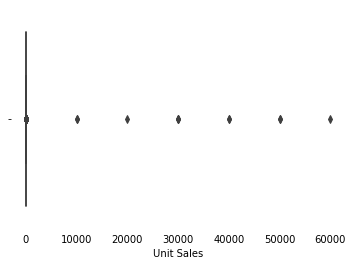

In [26]:
ax = sns.boxplot(x=Store_312["Unit Sales"])

sns.despine(top=True, right=True, left=True, bottom=True, ax=ax)
sns.set_palette("husl")
ax.xaxis.set_ticks_position('none') 

Our graph cannot be interpreted because the data contains very massive outliers. The scale is too large. One way to go around this is to transform the data onto a shorter scale. We can use the log transformtion for this.

However, the 'Unit Sales' column contains negative values, so we have to deal with that first as we cannot find the log of a number less than 1.

In [27]:
Store_312["Unit Sales"].min()

-6

The lowest number in the "Unit Sales" column is -6, so we have to add 7 to the entire column to ensure we won't get a MathError as a result of log(0) or anything less than 0.

In [28]:
import numpy as np

Store_312["log(Unit Sales)"] = Store_312["Unit Sales"] + 7
Store_312["log(Unit Sales)"] = Store_312["log(Unit Sales)"].apply(np.log)

In [29]:
Store_312.head()

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,log(Unit Sales)
0,79444,50012011250,312,2014-08-04,3,29.97,2.302585
1,79445,50012011250,312,2014-08-05,2,19.98,2.197225
2,79446,50012011250,312,2014-08-06,5,49.95,2.484907
3,79447,50012011250,312,2014-08-07,3,29.97,2.302585
4,79448,50012011250,312,2014-08-08,7,69.93,2.639057


The scales have now been standardized. Let us try and plot our boxplots.

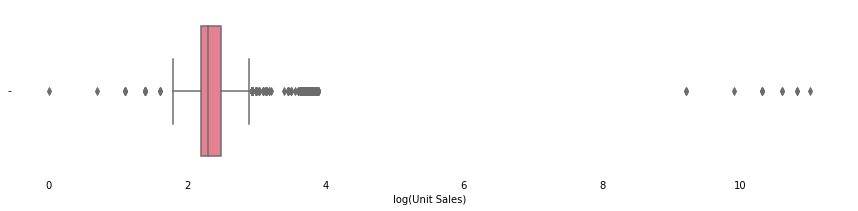

In [30]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(x=Store_312["log(Unit Sales)"], ax=ax)

sns.despine(top=True, right=True, left=True, bottom=True, ax=ax)
sns.set_palette("husl")
ax.xaxis.set_ticks_position('none')

We can instantly see here that all rows with a log(Unit Sales) > 9 are outliers. The "Unit Sales" that correspond to these values are in the thousands, which is a very unlikely sale for a small store. Let's see how many rows contain these outliers to conclude if it is safe to drop them.

In [31]:
len(Store_312[Store_312["log(Unit Sales)"]>9])

11

There are only 11 rows which contain outliers. We can delete them without impacting on our dataset that much.

In [32]:
Store_312 = Store_312.loc[Store_312["log(Unit Sales)"]<9]

In [33]:
len(Store_312)

3599

Let us plot our boxplot again, this time without using a transformed scale.

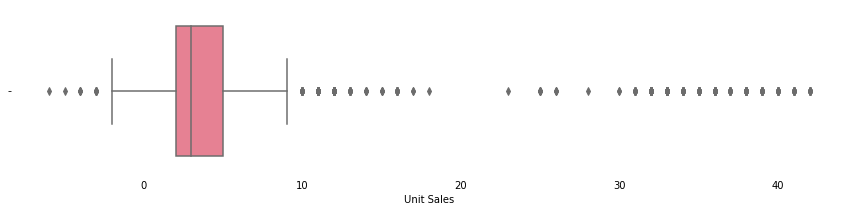

In [34]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(x=Store_312["Unit Sales"], ax=ax)

sns.despine(top=True, right=True, left=True, bottom=True, ax=ax)
sns.set_palette("husl")
ax.xaxis.set_ticks_position('none')

This now gives us a better view of the distribution of our sales. The boxplot shows us that sales/SKU are mostly between 2 to 5. We have a few which are bought in batches of 10 or more.

While we may have sales less than 0 that we can attribute to returns, sales of absolute 0 are most probably an error. Let's see if these exist and in what quantity.

In [35]:
len(Store_312[Store_312["Unit Sales"]==0])

34

They exist, and in quite a number as well. Let us delete them.

In [36]:
Store_312 = Store_312.loc[Store_312["Unit Sales"] != 0]
len(Store_312)

3565

Now that we're approaching the end of our data cleaning exercise, let's remove the columns we no longer need, i.e., the log column.

In [37]:
Store_312.drop(columns=["log(Unit Sales)"], inplace=True)

In [38]:
Store_312.head()

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
0,79444,50012011250,312,2014-08-04,3,29.97
1,79445,50012011250,312,2014-08-05,2,19.98
2,79446,50012011250,312,2014-08-06,5,49.95
3,79447,50012011250,312,2014-08-07,3,29.97
4,79448,50012011250,312,2014-08-08,7,69.93


Data cleaning on the surface seems to be done at this point for Store_312.

#### Exploring/Cleaning the SKU_Master Table

In [39]:
SKU_Master

,Department,Class,Style,Color,SKU,Cost,Price,Vendor
0,800,5,20,2,8000520021,7.5,9.99,MA Excellent Products
1,800,4,51,11,8000451112,9.0,12.99,MA Excellent Products
2,731,24,55,52,7312455520,25.0,31.99,MA Excellent Products
3,731,24,55,53,7312455530,14.5,22.99,GA General Wholesales
4,5001,201,12,4,50012011240,2.5,7.99,China Imports
5,5001,201,12,5,50012011250,7.5,9.99,China Imports
6,5001,201,13,4,50012011341,8.0,6.99,China Imports
7,5001,300,1,1,50013000110,6.5,12.99,China Imports


The SKU_Master table is small enough for us to inspect it visually, row by row. The first error we notice by doing this is on row_index 6, SKU  50012011341. The cost of this SKU seems to be more than its price. This is either a typing error, or a mistake that has been costing the business significantly over the last few years. To investigate which one it is, let's go back to the Store_312 table, where SKU = 50012011341.

In [40]:
print("This subset has {} rows".format(len(Store_312[Store_312["SKU"]==50012011341])))
b = Store_312.loc[Store_312["SKU"]==50012011341]
b.head()

This subset has 137 rows


,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
963,82863,50012011341,312,2016-01-04,2,9.98
964,82864,50012011341,312,2016-01-06,3,14.97
965,82865,50012011341,312,2016-01-07,3,14.97
966,82866,50012011341,312,2016-01-11,3,14.97
967,82867,50012011341,312,2016-01-12,2,9.98


Let's create 3 columns to investigate our error. One is a "Cost" column, which is a product of "Cost" from SKU_Master and "Unit Sales".The second is a "Calculated Dollar Sales" column, which is "Unit Sales" * "Price" to check whether it'll be the same with the existing "Dollar Sales" column. The third will be the difference column between the existing "Dollar Sales" and the "Cost" columns.

In [41]:
pd.options.mode.chained_assignment = None

b["Cost"] = b["Unit Sales"] * 8
b["Calc Dollar Sales"] = b["Unit Sales"] * 6.99
b["Difference"] = b["Dollar Sales"] - b["Cost"]

In [42]:
b.head()

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,Cost,Calc Dollar Sales,Difference
963,82863,50012011341,312,2016-01-04,2,9.98,16,13.98,-6.02
964,82864,50012011341,312,2016-01-06,3,14.97,24,20.97,-9.03
965,82865,50012011341,312,2016-01-07,3,14.97,24,20.97,-9.03
966,82866,50012011341,312,2016-01-11,3,14.97,24,20.97,-9.03
967,82867,50012011341,312,2016-01-12,2,9.98,16,13.98,-6.02


We can instantly see here that "Difference" is negative. "Dollar Sales" and "Calc Dollar Sales" are also different from each other. This may mean that both "Cost" and "Price" in the SKU_Master table are wrong, or the "Dollar Sales" column in the Store_312 table is wrong. To check which is which, we can carry out the same process as above for a different SKU.

Let's use SKU = 50012011250

In [43]:
c = Store_312.loc[Store_312["SKU"]==50012011250]
c.head()

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
0,79444,50012011250,312,2014-08-04,3,29.97
1,79445,50012011250,312,2014-08-05,2,19.98
2,79446,50012011250,312,2014-08-06,5,49.95
3,79447,50012011250,312,2014-08-07,3,29.97
4,79448,50012011250,312,2014-08-08,7,69.93


In [44]:
pd.options.mode.chained_assignment = None

c["Cost"] = c["Unit Sales"] * 7.5
c["Calc Dollar Sales"] = c["Unit Sales"] * 9.99
c["Difference"] = c["Dollar Sales"] - c["Cost"]

In [45]:
c.head()

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,Cost,Calc Dollar Sales,Difference
0,79444,50012011250,312,2014-08-04,3,29.97,22.5,29.97,7.47
1,79445,50012011250,312,2014-08-05,2,19.98,15.0,19.98,4.98
2,79446,50012011250,312,2014-08-06,5,49.95,37.5,49.95,12.45
3,79447,50012011250,312,2014-08-07,3,29.97,22.5,29.97,7.47
4,79448,50012011250,312,2014-08-08,7,69.93,52.5,69.93,17.43


For SKU 50012011250, "Dollar Sales" == "Calc Dollar Sales". Based on this, let's first presume that the entire "Dollar Sales" column in Store_312 is correct.

Let's now try & calculate the price for SKU 50012011341 using the formula "Price" = "Dollar Sales" / "Unit Sales".

In [46]:
pd.options.mode.chained_assignment = None

b["Price"] = b["Dollar Sales"] / b["Unit Sales"]

b.head()

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,Cost,Calc Dollar Sales,Difference,Price
963,82863,50012011341,312,2016-01-04,2,9.98,16,13.98,-6.02,4.99
964,82864,50012011341,312,2016-01-06,3,14.97,24,20.97,-9.03,4.99
965,82865,50012011341,312,2016-01-07,3,14.97,24,20.97,-9.03,4.99
966,82866,50012011341,312,2016-01-11,3,14.97,24,20.97,-9.03,4.99
967,82867,50012011341,312,2016-01-12,2,9.98,16,13.98,-6.02,4.99


The "Price" produced by this operation is 4.99. Because of our limited data, we'll assume that this price is the correct one. This then has the effect of also having to adjust the cost in the SKU_Master table.

In [47]:
SKU_Master

,Department,Class,Style,Color,SKU,Cost,Price,Vendor
0,800,5,20,2,8000520021,7.5,9.99,MA Excellent Products
1,800,4,51,11,8000451112,9.0,12.99,MA Excellent Products
2,731,24,55,52,7312455520,25.0,31.99,MA Excellent Products
3,731,24,55,53,7312455530,14.5,22.99,GA General Wholesales
4,5001,201,12,4,50012011240,2.5,7.99,China Imports
5,5001,201,12,5,50012011250,7.5,9.99,China Imports
6,5001,201,13,4,50012011341,8.0,6.99,China Imports
7,5001,300,1,1,50013000110,6.5,12.99,China Imports


Taking a look at the table again, we can see that 50012011341 belongs to department 5001. The lowest cost in this department is 2.5. Since we found the price of 50012011341 to be 4.99, we'll use 2.5 as its cost.

Let's proceed to correct this in the table then.

In [48]:
SKU_Master.loc[6, "Cost"] = 2.5
SKU_Master.loc[6, "Price"] = 4.99

In [49]:
SKU_Master

,Department,Class,Style,Color,SKU,Cost,Price,Vendor
0,800,5,20,2,8000520021,7.5,9.99,MA Excellent Products
1,800,4,51,11,8000451112,9.0,12.99,MA Excellent Products
2,731,24,55,52,7312455520,25.0,31.99,MA Excellent Products
3,731,24,55,53,7312455530,14.5,22.99,GA General Wholesales
4,5001,201,12,4,50012011240,2.5,7.99,China Imports
5,5001,201,12,5,50012011250,7.5,9.99,China Imports
6,5001,201,13,4,50012011341,2.5,4.99,China Imports
7,5001,300,1,1,50013000110,6.5,12.99,China Imports


The value has now been updated.

Now, let's recheck if the SKUs in the SKU_Master table are the same as the ones in the Store_312 table.

In [50]:
print("Store_312 SKUs: {}".format(np.sort(Store_312["SKU"].unique())))
print("SKU_Master SKUs: {}".format(np.sort(SKU_Master["SKU"].unique())))

Store_312 SKUs: [ 7312455520  7312455530  8000451112  8000520021 50012011240 50012011250
 50012011340 50012011341 50013000110]
SKU_Master SKUs: [ 7312455520  7312455530  8000451112  8000520021 50012011240 50012011250
 50012011341 50013000110]


Store_312 seems to have one additional SKU to SKU_Master. The culprit here is SKU = 50012011340. Judging by the pattern of the numbers in this SKU, it belongs to department 5001.

In [51]:
len(Store_312[Store_312.SKU == 50012011340])

313

The SKU has 313 rows, making it a very unlikely that it is an error. The likely reason it's missing in the SKU_Master table is that the version of SKU_Master table we were supplied with is not up-to-date, or has an ommission.

To add this SKU to the SKU_Master table, we'll need most importantly its "Cost" and "Price". Price can be calculated from Store_312. However, for cost we'll need to find a way to assign it.

In [52]:
d = Store_312.loc[Store_312.SKU == 50012011340]

In [53]:
d.head(15)

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
616,82516,50012011340,312,2014-08-04,3,14.97
617,82517,50012011340,312,2014-08-05,2,9.98
618,82518,50012011340,312,2014-08-06,1,4.99
619,82519,50012011340,312,2014-08-11,1,4.99
620,82520,50012011340,312,2014-08-12,2,9.98
621,82521,50012011340,312,2014-08-13,3,14.97
622,82522,50012011340,312,2014-08-14,3,14.97
624,82524,50012011340,312,2014-08-16,3,14.97
625,82525,50012011340,312,2014-08-18,3,14.97
627,82527,50012011340,312,2014-08-23,3,14.97


In [54]:
price = 14.97/3
price

4.99

SKU 50012011340 and SKU 50012011341 seem to have the same price. Let's also assign them the same cost.

In [55]:
row8 = [[5001, 201, 13, 4, 50012011340, 2.5, 4.99, "China Imports"]]
cols = SKU_Master.columns
cols = list(cols)
e = pd.DataFrame(row8, columns=cols)
SKU_Master = SKU_Master.append(e, ignore_index=True)

In [56]:
SKU_Master

,Department,Class,Style,Color,SKU,Cost,Price,Vendor
0,800,5,20,2,8000520021,7.5,9.99,MA Excellent Products
1,800,4,51,11,8000451112,9.0,12.99,MA Excellent Products
2,731,24,55,52,7312455520,25.0,31.99,MA Excellent Products
3,731,24,55,53,7312455530,14.5,22.99,GA General Wholesales
4,5001,201,12,4,50012011240,2.5,7.99,China Imports
5,5001,201,12,5,50012011250,7.5,9.99,China Imports
6,5001,201,13,4,50012011341,2.5,4.99,China Imports
7,5001,300,1,1,50013000110,6.5,12.99,China Imports
8,5001,201,13,4,50012011340,2.5,4.99,China Imports


The SKU has now been added to the table.

The inconsistencies between SKU_Master and Store_312 are very intriguing. So much so that we should check if the prices for every SKU in Store_312 are the same as the ones listed in the SKU_Master table.

In [57]:
Store_312["Price"] = Store_312["Dollar Sales"] / Store_312["Unit Sales"]

In [58]:
Store_312[["SKU", "Price"]].groupby("SKU").agg("mean").sort_index()

,Price
SKU,
7312455520,28.820065
7312455530,22.990000
8000451112,14.502238
8000520021,9.990000
50012011240,8.882713
50012011250,10.773972
50012011340,5.168914
50012011341,5.165182
50013000110,12.990000


The prices shown in the table above are averages across each SKU group. Since we expect these to be the same, the averages should return figures identical to those in the SKU_Master table.

In [59]:
SKU_Master[["SKU", "Price"]].sort_values(by=["SKU"])

,SKU,Price
2,7312455520,31.99
3,7312455530,22.99
1,8000451112,12.99
0,8000520021,9.99
4,50012011240,7.99
5,50012011250,9.99
8,50012011340,4.99
6,50012011341,4.99
7,50013000110,12.99


Some of the SKU prices in the Store_312 table are not the same as their counterparts in SKU_Master. The averaged out prices point to different prices within an SKU group, for different sales.

Let's print out unique values in the "Prices" column to investigate this further.

In [60]:
Store_312["Price"].unique()

array([ 9.99, 99.99, 99.99,  4.99, 12.99, 12.99, 25.99, 22.99, 29.99,
       31.99, 22.99,  7.99,  7.99, 70.99])

The first anomaly is the figure 99.99. Let's see which rows have this price.

In [61]:
Store_312[Store_312["Price"]==99.99]

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,Price
124,79568,50012011250,312,2014-12-30,7,699.93,99.99
427,79871,50012011250,312,2015-12-24,5,499.95,99.99
470,79914,50012011250,312,2016-02-13,2,199.98,99.99


The SKU 50012011250 is responsible for all 99.99 prices. Cross checking the SKU_Master table, SKU 50012011250 has a price of 9.99. We can therefore attribute this to an arithmetic error, whereby each row was multiplied by 10. Lets divide the "Dollar Sales" for this subset by 10.

In [62]:
Store_312.loc[Store_312.Price==99.99, "Dollar Sales"] = Store_312.loc[Store_312.Price==99.99, "Dollar Sales"]/10


In [63]:
Store_312[Store_312["Price"]==99.99]

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,Price
124,79568,50012011250,312,2014-12-30,7,69.993,99.99
427,79871,50012011250,312,2015-12-24,5,49.995,99.99
470,79914,50012011250,312,2016-02-13,2,19.998,99.99


The values have now changed.

Let's print the other rows with values outside of SKU_Master table.

In [64]:
Store_312[(Store_312["Price"]==25.99) | (Store_312["Price"]==29.99) | (Store_312["Price"]==70.99)]

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,Price
1144,89596,8000451112,312,2014-09-08,2,51.98,25.99
1147,89599,8000451112,312,2014-09-10,4,103.96,25.99
1153,89605,8000451112,312,2014-09-22,2,51.98,25.99
1154,89606,8000451112,312,2014-09-22,2,51.98,25.99
1159,89611,8000451112,312,2014-09-29,2,51.98,25.99
1162,89614,8000451112,312,2014-10-13,2,51.98,25.99
1168,89620,8000451112,312,2014-10-27,2,51.98,25.99
1173,89625,8000451112,312,2014-11-03,2,51.98,25.99
1181,89633,8000451112,312,2014-11-17,8,207.92,25.99
1193,89645,8000451112,312,2014-12-01,2,51.98,25.99


After exploring the subset above, we can see that SKU 8000451112 is responsible for the 25.99 prices and part of the 29.99 prices. Interestingly, we can see that 25.99 prices are in the last quarter of 2014 going into the first quarter of 2015. Midway in the first quarter of 2015, the prices rise to 29.99. This might not be an error at all. Most likely it's a price increase related to certain constraints the business might have been facing.

The same line of reasoning applies for SKU 7312455520. In the SKU_Master table, it has a price of 31.99. The 29.99 price observed in the subset above is from late in the last quarter of 2015, into early 2016. This is most likely a festive period discount, rather than a mistake.

However, for SKU 50012011240, the price anomally is 70.99 for a single item. In the SKU_Master table, the corresponding price is 7.99. This seems to be a typing error that occured when the Dollar Sales were being calculated. Let's correct that.

In [65]:
Store_312.loc[Store_312.Price==70.99, "Dollar Sales"] = Store_312.loc[Store_312.Price==70.99, "Unit Sales"] * 7.99

In [66]:
Store_312[Store_312.Price==70.99]

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,Price
3171,2001274,50012011240,312,2014-08-26,3,23.97,70.99
3197,2001300,50012011240,312,2014-10-06,4,31.96,70.99
3262,2001364,50012011240,312,2014-12-27,1,7.99,70.99
3456,2001557,50012011240,312,2015-09-07,3,23.97,70.99
3462,2001563,50012011240,312,2015-09-16,2,15.98,70.99
3565,2001665,50012011240,312,2016-02-16,1,7.99,70.99
3639,2001739,50012011240,312,2016-05-25,1,7.99,70.99


Our data seems to have changed.

Now that we're done making corrections as far as prices, dollar sales and unit sales in the 2 tables are concerned, we can now remove the price column in Store_312. It is no longer needed. Come to think of it, the "DB_ID" and "Store" columns have also become redundant going forward. We should remove those also.

In [67]:
Store_312.drop(columns=["DB_ID", "Store", "Price"], inplace=True)

In [68]:
Store_312.head()

,SKU,Date,Unit Sales,Dollar Sales
0,50012011250,2014-08-04,3,29.97
1,50012011250,2014-08-05,2,19.98
2,50012011250,2014-08-06,5,49.95
3,50012011250,2014-08-07,3,29.97
4,50012011250,2014-08-08,7,69.93


Preliminary data cleaning seems now to be complete. Let's view our new summary statistics:

In [69]:
Store_312.describe()

,SKU,Unit Sales,Dollar Sales
count,3.565000e+03,3565.000000,3565.000000
mean,2.603877e+10,5.836185,76.003665
std,2.097051e+10,9.060161,118.687584
min,7.312456e+09,-6.000000,-59.940000
25%,8.000451e+09,2.000000,15.980000
50%,8.000520e+09,3.000000,31.990000
75%,5.001201e+10,5.000000,68.970000
max,5.001300e+10,42.000000,545.580000


The dataset is now much more leaner, free from outliers and corrected for inconsistencies.

However, data cleaning is an iterative process that should be carried out as you carry on with your analysis. For this reason, it is important to do **Exploratory Data Analysis**. EDA answers a set of questions the analyst would have set at the beginning of the project - objectives. These objectives should ask questions that cut across most, if not every, dimension of the data. This will allow the researcher to identify any shortfalls existing in the data, and to subsequently correct them.

Let's now create a snapshot of our dataset and store it in a csv.

In [70]:
# Use your own paths.
Store_312.to_csv("/Users/mac/Desktop/Data Science/Projects/TinyCo Project/Store_312_clean.csv")
SKU_Master.to_csv("/Users/mac/Desktop/Data Science/Projects/TinyCo Project/SKU_Master_clean.csv")

***End of Part 1*** <br>
Please go to Part 2 for the Exploratory Data Analysis part of the project.

<br>
<br>
<br>
<br>
***
<footer>_Author: Simbarashe Chikaura -- Data Analyst_</footer>
***